## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

6. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

In [6]:
# Unduh Dataset MNIST
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk
from skimage.feature import hog
from skimage import data, exposure
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

mnist = fetch_openml('mnist_784')

c:\Users\asus\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

Jumlah data untuk label 0: 6903
Jumlah data untuk label 1: 7877
Jumlah data untuk label 2: 6990
Jumlah data untuk label 3: 7141
Jumlah data untuk label 4: 6824
Jumlah data untuk label 5: 6313
Jumlah data untuk label 6: 6876
Jumlah data untuk label 7: 7293
Jumlah data untuk label 8: 6825
Jumlah data untuk label 9: 6958
Dataset MNIST seimbang secara data.


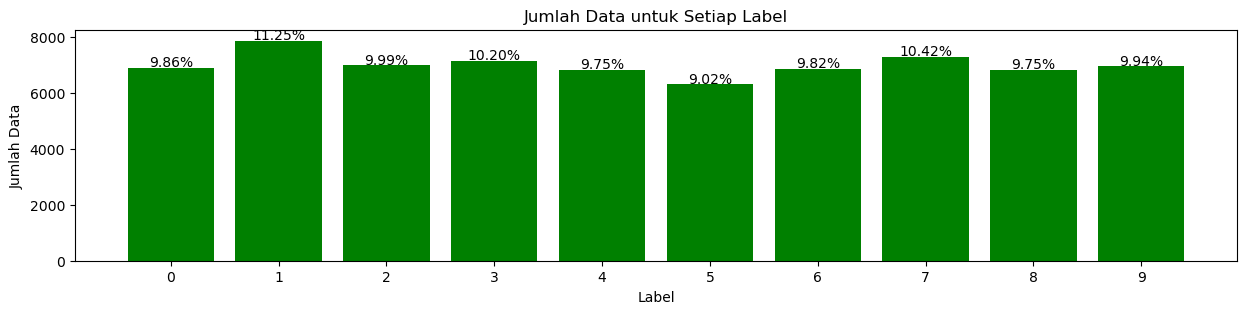

In [10]:
# Menghitung jumlah data setiap label
y = mnist.target.astype(np.int64)
label_counts = np.bincount(y)

for i, count in enumerate(label_counts):
    print(f"Jumlah data untuk label {i}: {count}")

# Menampilkan apakah ada ketidakseimbangan data
is_imbalanced = len(set(label_counts)) == 1
if is_imbalanced:
    print("Dataset MNIST memiliki ketidakseimbangan data.")
else:
    print("Dataset MNIST seimbang secara data.")

# Menghitung persentase dari data tiap label
total_data = len(y)
label_percentages = label_counts / total_data * 100

# Menampilkan jumlah data untuk setiap label beserta presentasenya
plt.figure(figsize=(15, 3))
plt.bar(range(10), label_counts, color='green')
plt.xticks(range(10))
plt.xlabel("Label")
plt.ylabel("Jumlah Data")
plt.title("Jumlah Data untuk Setiap Label")

# Menambahkan presentase di atas setiap bar
for i, count in enumerate(label_counts):
    plt.text(i, count + 50, f"{label_percentages[i]:.2f}%", ha='center')

plt.show()


2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

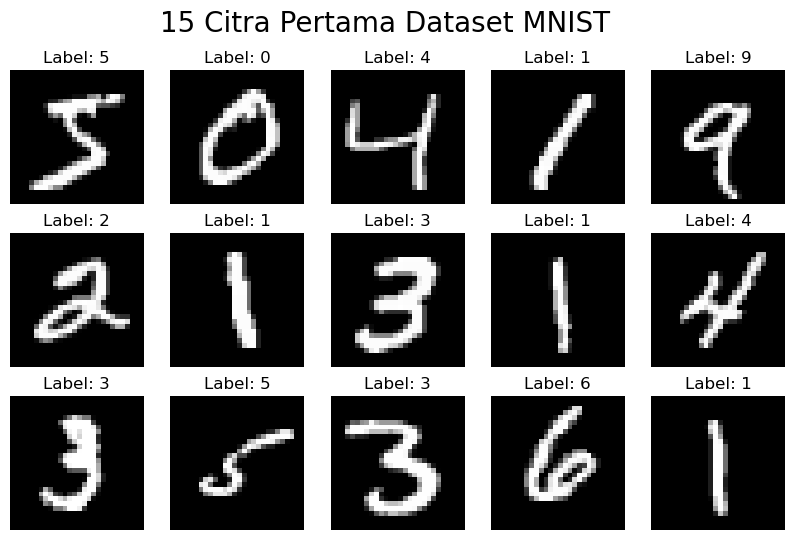

In [8]:
# Menggunakan variabel yang benar
X = mnist.data.to_numpy()
y = mnist.target.astype(np.int64)

plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')  # Menggunakan X bukan x
    plt.title('Label: {}'.format(y[i]))
    plt.axis('off')

plt.suptitle('15 Citra Pertama Dataset MNIST', fontsize=20)
plt.show()

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

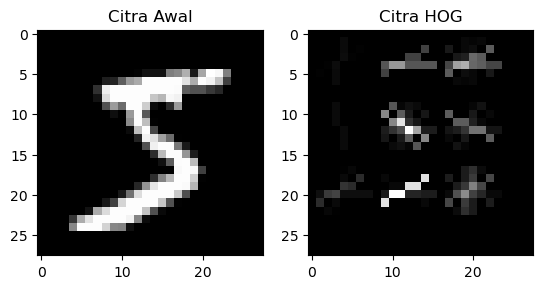

In [9]:
#ekstract fitur Hog from the chosen image
def display_ekstract_hog_features(image):
    #reshape the image to its original shape 28x28
    image = image.reshape((28,28))
    #calculate Hog Features
    hog_features, hog_image = hog(image,pixels_per_cell=(8,8), cells_per_block=(2,2), visualize=True)
    return hog_features, hog_image

#ekstract HOG features and get the hog image
hog_features, hog_image = display_ekstract_hog_features(X[0])

#display the original image
plt.subplot(1,2,1)
plt.imshow(X[0].reshape((28,28)), cmap='gray')
plt.title('Citra Awal')

#display the hog image
plt.subplot(1,2,2)
plt.imshow(hog_image, cmap='gray')
plt.title('Citra HOG')
plt.show()

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

6. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.


8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!